# 5 Video Conferencing Stocks Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# 5 Video Conferencing Stocks Wave
title = "Video Conferencing Stocks"
symbols = ['RNG', 'MSFT', 'LOGM', 'GOOGL', 'ZM']
start = '2019-05-01'
end = '2020-08-21'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

477

In [7]:
df.head()

,RNG,MSFT,LOGM,GOOGL,ZM
Date,,,,,
2019-05-01,114.870003,125.556122,79.965652,1173.319946,72.760002
2019-05-02,115.489998,123.916473,80.222244,1166.510010,75.500000
2019-05-03,119.459999,126.557594,81.110420,1189.550049,79.180000
2019-05-06,121.059998,125.821205,81.653198,1193.459961,78.239998
2019-05-07,118.150002,123.239006,79.706360,1178.859985,73.330002


In [8]:
df.tail()

,RNG,MSFT,LOGM,GOOGL,ZM
Date,,,,,
2020-08-14,284.420013,208.396240,85.940002,1504.630005,244.910004
2020-08-17,292.350006,209.772919,85.940002,1516.239990,266.149994
2020-08-18,290.839996,210.979996,85.940002,1555.780029,276.799988
2020-08-19,288.480011,209.699997,85.940002,1544.609985,273.510010
2020-08-20,290.380005,214.580002,85.970001,1576.250000,290.690002


In [9]:
df.min()

RNG       110.919998
MSFT      118.097771
LOGM       65.370865
GOOGL    1038.739990
ZM         62.000000
dtype: float64

In [10]:
df.max()

RNG       305.359985
MSFT      216.017807
LOGM       86.550003
GOOGL    1576.250000
ZM        290.690002
dtype: float64

In [11]:
df.describe()

,RNG,MSFT,LOGM,GOOGL,ZM
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,189.595801,158.155668,78.704947,1295.781268,122.457039
std,58.563276,26.495490,7.179298,139.924276,64.824611
min,110.919998,118.097771,65.370865,1038.739990,62.000000
25%,134.464996,135.844734,71.516403,1176.915039,75.664997
50%,172.470001,150.552383,81.110420,1288.859985,92.690002
75%,239.430000,180.392914,85.360001,1420.510010,150.254997
max,305.359985,216.017807,86.550003,1576.250000,290.690002


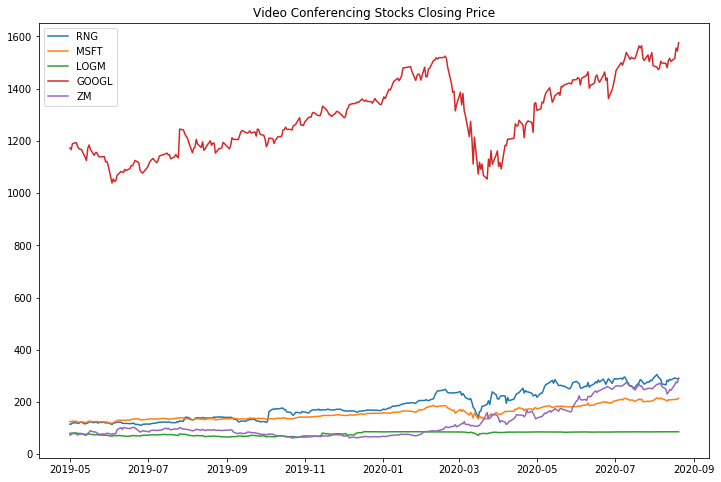

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [13]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

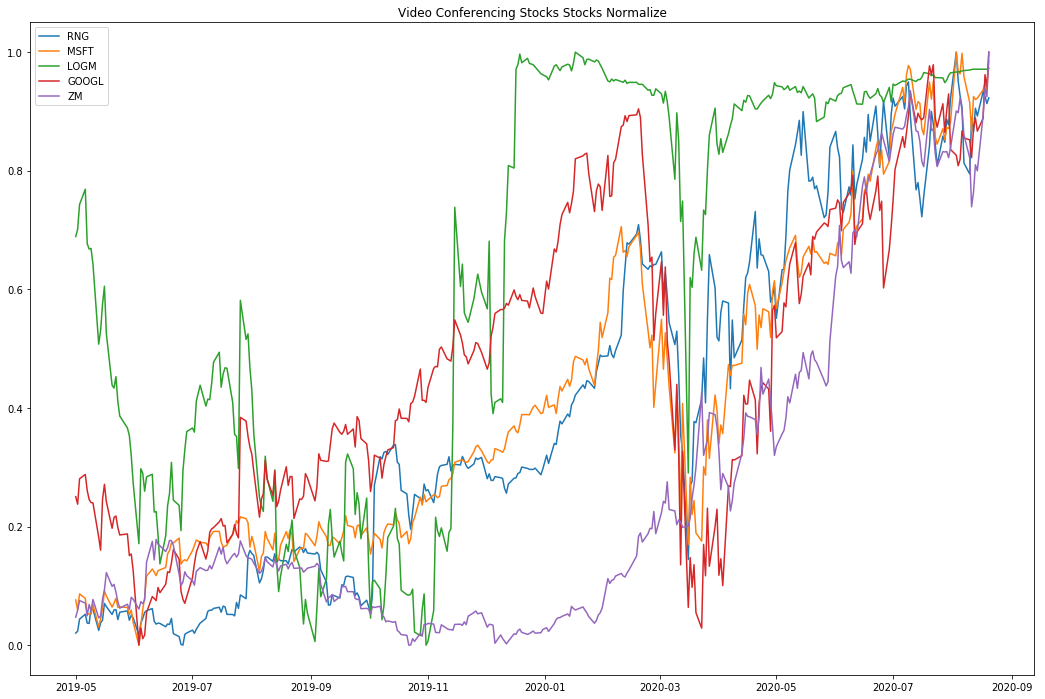

In [14]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [15]:
stock_rets = df.pct_change().dropna()

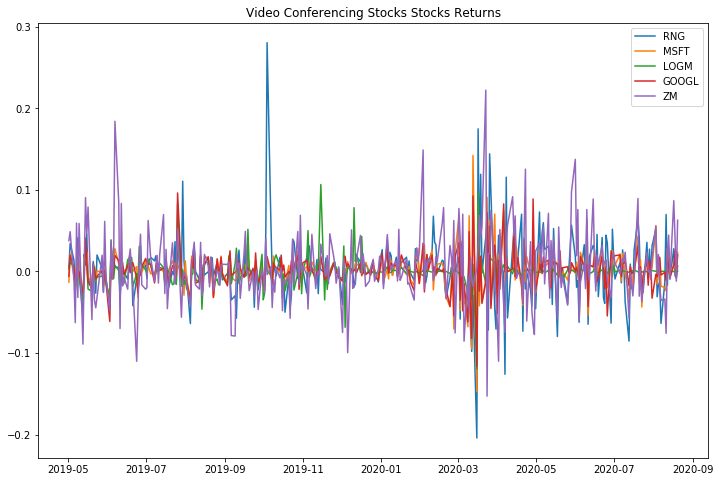

In [16]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

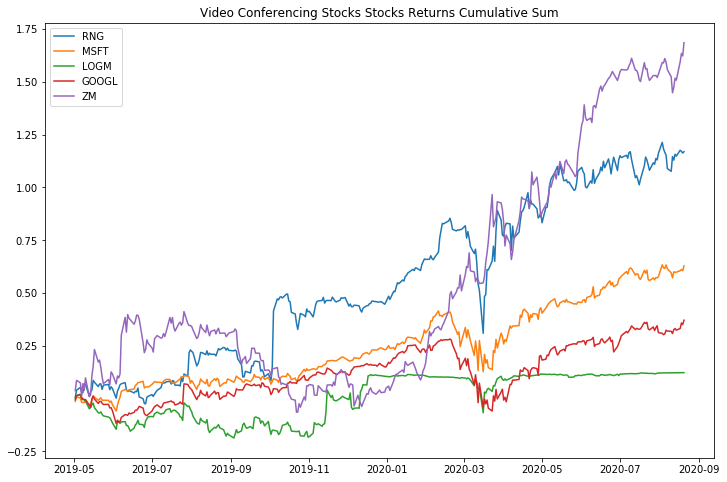

In [17]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

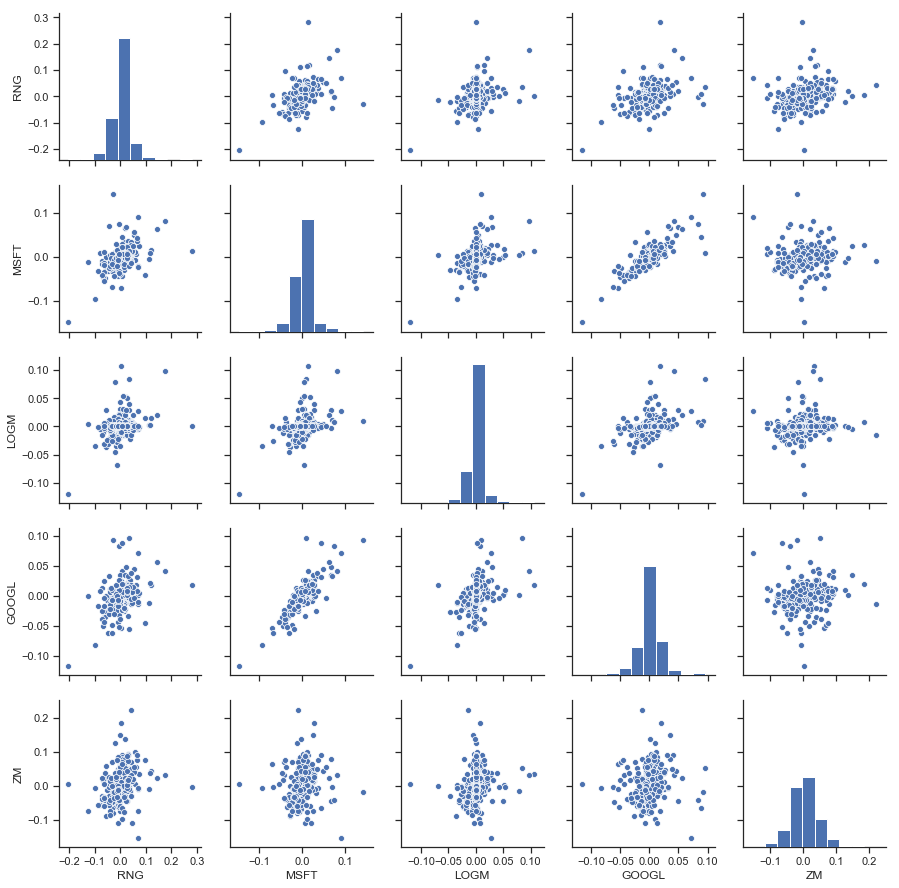

In [18]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

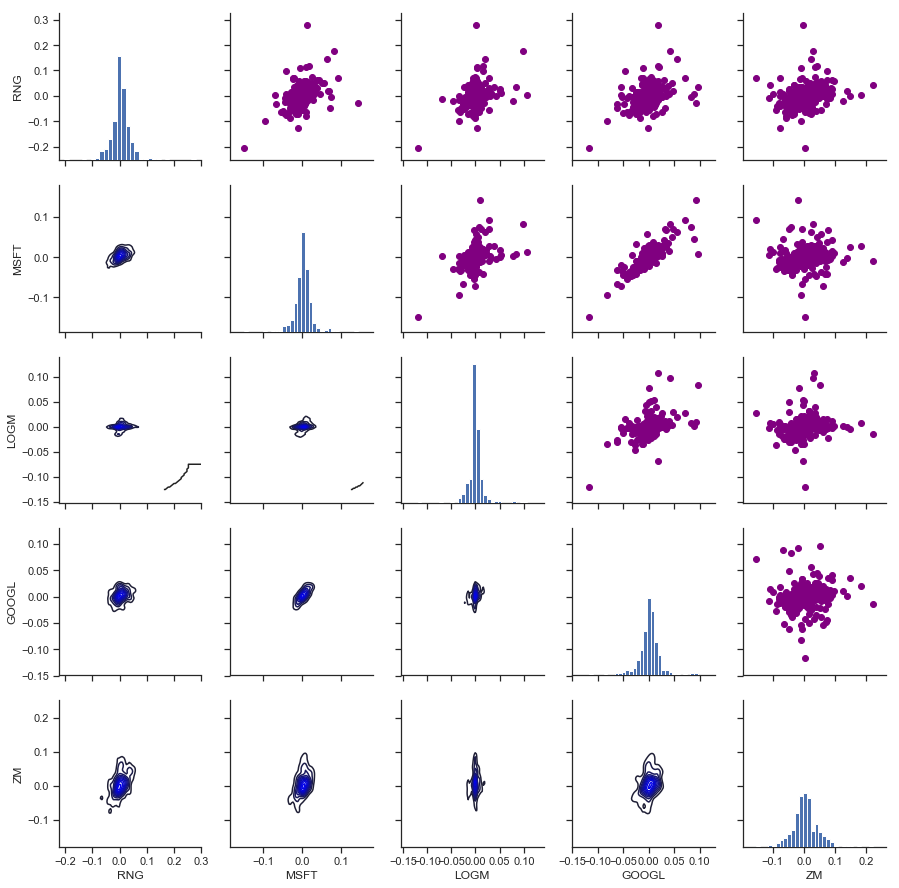

In [19]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

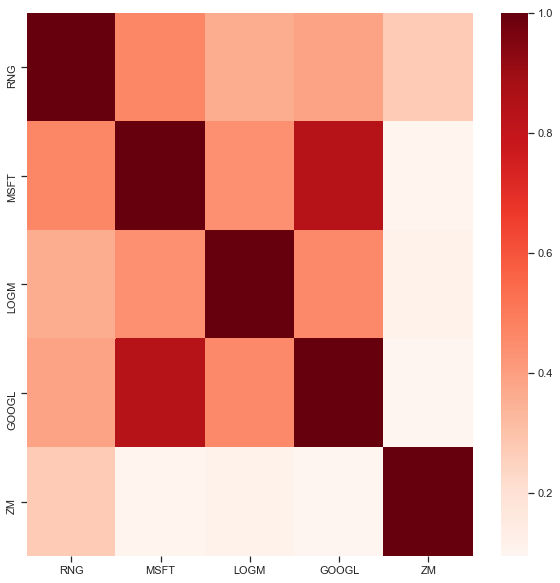

In [20]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

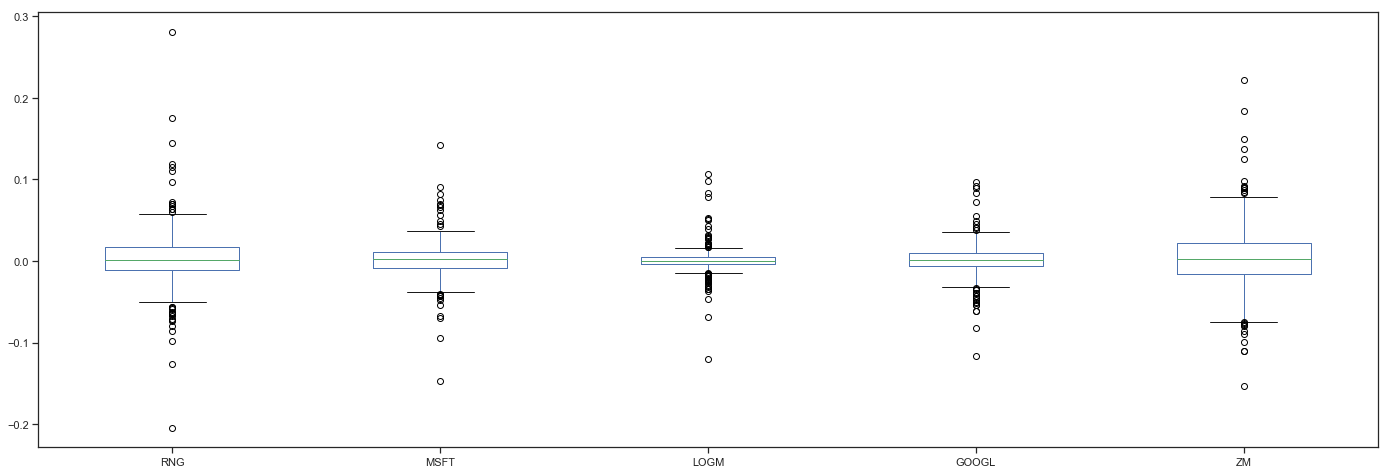

In [21]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

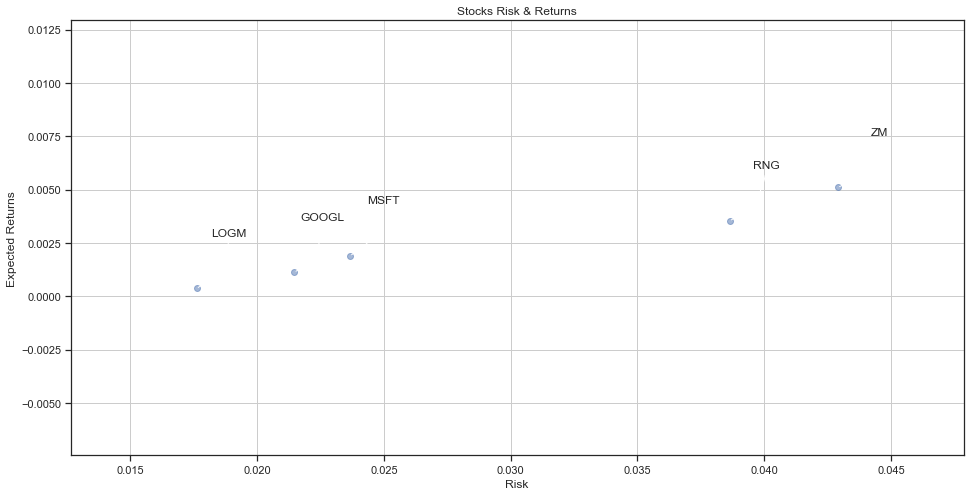

In [22]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

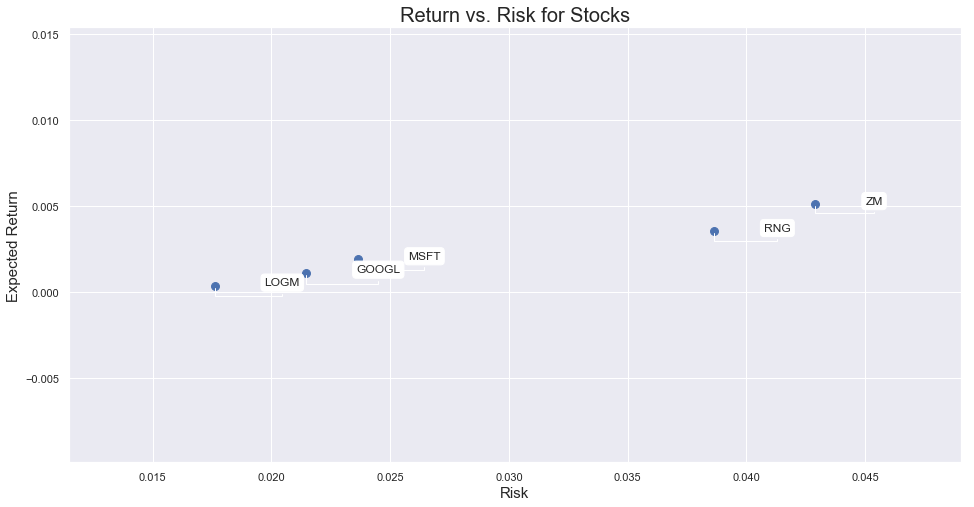

In [23]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [24]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [25]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
RNG,0.893126,0.613340
MSFT,0.480025,0.375512
LOGM,0.094015,0.279553
GOOGL,0.283538,0.340807
ZM,1.287245,0.681089


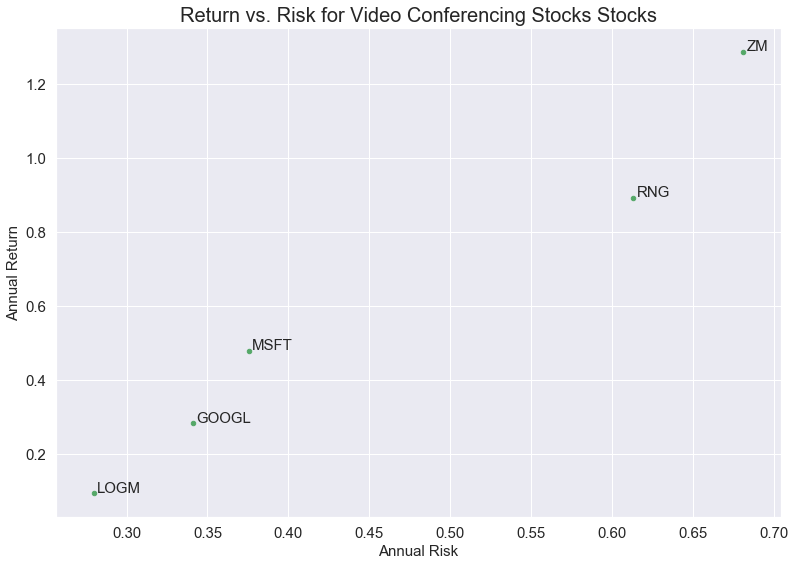

In [26]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [27]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ZM     ZM       1.000000
GOOGL  GOOGL    1.000000
MSFT   MSFT     1.000000
LOGM   LOGM     1.000000
RNG    RNG      1.000000
MSFT   GOOGL    0.839383
GOOGL  MSFT     0.839383
RNG    MSFT     0.465091
MSFT   RNG      0.465091
GOOGL  LOGM     0.456610
LOGM   GOOGL    0.456610
       MSFT     0.439389
MSFT   LOGM     0.439389
GOOGL  RNG      0.389116
RNG    GOOGL    0.389116
       LOGM     0.360740
LOGM   RNG      0.360740
RNG    ZM       0.271690
ZM     RNG      0.271690
       LOGM     0.112991
LOGM   ZM       0.112991
MSFT   ZM       0.101311
ZM     MSFT     0.101311
GOOGL  ZM       0.093773
ZM     GOOGL    0.093773
dtype: float64

In [28]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,RNG,MSFT,LOGM,GOOGL,ZM
Date,,,,,
2019-05-02,0.432442,0.463916,0.542931,0.520069,0.507863
2019-05-03,0.492252,0.582624,0.577710,0.640305,0.537419
2019-05-06,0.448946,0.488922,0.558338,0.562841,0.375787
2019-05-07,0.371690,0.438140,0.423277,0.489820,0.240100
2019-05-08,0.419556,0.508742,0.518292,0.515129,0.565629


In [29]:
Normalized_Value.corr()

,RNG,MSFT,LOGM,GOOGL,ZM
RNG,1.000000,0.465091,0.360740,0.389116,0.271690
MSFT,0.465091,1.000000,0.439389,0.839383,0.101311
LOGM,0.360740,0.439389,1.000000,0.456610,0.112991
GOOGL,0.389116,0.839383,0.456610,1.000000,0.093773
ZM,0.271690,0.101311,0.112991,0.093773,1.000000


In [30]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ZM     ZM       1.000000
GOOGL  GOOGL    1.000000
MSFT   MSFT     1.000000
LOGM   LOGM     1.000000
RNG    RNG      1.000000
MSFT   GOOGL    0.839383
GOOGL  MSFT     0.839383
RNG    MSFT     0.465091
MSFT   RNG      0.465091
GOOGL  LOGM     0.456610
LOGM   GOOGL    0.456610
       MSFT     0.439389
MSFT   LOGM     0.439389
GOOGL  RNG      0.389116
RNG    GOOGL    0.389116
       LOGM     0.360740
LOGM   RNG      0.360740
RNG    ZM       0.271690
ZM     RNG      0.271690
       LOGM     0.112991
LOGM   ZM       0.112991
MSFT   ZM       0.101311
ZM     MSFT     0.101311
GOOGL  ZM       0.093773
ZM     GOOGL    0.093773
dtype: float64

In [31]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
RNG      0.003544
MSFT     0.001905
LOGM     0.000373
GOOGL    0.001125
ZM       0.005108
dtype: float64
--------------------------------------------------
Stock risks:
RNG      0.038637
MSFT     0.023655
LOGM     0.017610
GOOGL    0.021469
ZM       0.042905
dtype: float64


In [32]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
LOGM,0.000373,0.017610
GOOGL,0.001125,0.021469
MSFT,0.001905,0.023655
RNG,0.003544,0.038637
ZM,0.005108,0.042905


In [33]:
table.sort_values(by='Risk')

,Returns,Risk
LOGM,0.000373,0.017610
GOOGL,0.001125,0.021469
MSFT,0.001905,0.023655
RNG,0.003544,0.038637
ZM,0.005108,0.042905


In [34]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
RNG,0.003544,0.038637,-0.167091
MSFT,0.001905,0.023655,-0.342217
LOGM,0.000373,0.017610,-0.546668
GOOGL,0.001125,0.021469,-0.413384
ZM,0.005108,0.042905,-0.114018


In [35]:
table['Max Returns'] = rets.max()

In [36]:
table['Min Returns'] = rets.min()

In [37]:
table['Median Returns'] = rets.median()

In [38]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
RNG,0.003544,0.038637,-0.167091,0.280383,-0.204124,0.001670,0.658622
MSFT,0.001905,0.023655,-0.342217,0.142169,-0.147390,0.001868,2.327136
LOGM,0.000373,0.017610,-0.546668,0.106543,-0.119537,0.000000,0.034907
GOOGL,0.001125,0.021469,-0.413384,0.096202,-0.116342,0.001248,2.048414
ZM,0.005108,0.042905,-0.114018,0.222214,-0.152795,0.001994,6.281303


In [39]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
RNG,0.003544,0.038637,-0.167091,0.280383,-0.204124,0.001670,0.658622,1.376242e-05
MSFT,0.001905,0.023655,-0.342217,0.142169,-0.147390,0.001868,2.327136,4.822908e-05
LOGM,0.000373,0.017610,-0.546668,0.106543,-0.119537,0.000000,0.034907,7.316683e-07
GOOGL,0.001125,0.021469,-0.413384,0.096202,-0.116342,0.001248,2.048414,4.251069e-05
ZM,0.005108,0.042905,-0.114018,0.222214,-0.152795,0.001994,6.281303,1.277214e-04


In [40]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
RNG,0.003544,0.038637,-0.167091,0.280383,-0.204124,0.001670,0.658622,1.376242e-05,0.632221
MSFT,0.001905,0.023655,-0.342217,0.142169,-0.147390,0.001868,2.327136,4.822908e-05,0.327281
LOGM,0.000373,0.017610,-0.546668,0.106543,-0.119537,0.000000,0.034907,7.316683e-07,0.038991
GOOGL,0.001125,0.021469,-0.413384,0.096202,-0.116342,0.001248,2.048414,4.251069e-05,0.168780
ZM,0.005108,0.042905,-0.114018,0.222214,-0.152795,0.001994,6.281303,1.277214e-04,1.078707


In [41]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LOGM,0.000373,0.017610,-0.546668,0.106543,-0.119537,0.000000,0.034907,7.316683e-07,0.038991
RNG,0.003544,0.038637,-0.167091,0.280383,-0.204124,0.001670,0.658622,1.376242e-05,0.632221
GOOGL,0.001125,0.021469,-0.413384,0.096202,-0.116342,0.001248,2.048414,4.251069e-05,0.168780
MSFT,0.001905,0.023655,-0.342217,0.142169,-0.147390,0.001868,2.327136,4.822908e-05,0.327281
ZM,0.005108,0.042905,-0.114018,0.222214,-0.152795,0.001994,6.281303,1.277214e-04,1.078707
